In [162]:
import pandas as ps
import numpy as pn
import zipfile
import matplotlib.pyplot as mt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# from sklearn.metrics import  mean_squared_error
from sklearn import datasets, linear_model
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report

In [59]:
fd=ps.read_csv("C:/Users/Harshit/Downloads/Telecom_Churn/Telecom Churn/churn_data.csv")
fd

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [60]:
fd1=ps.read_csv("C:/Users/Harshit/Downloads/Telecom_Churn/Telecom Churn/internet_data.csv")
fd1

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,Yes,Fiber optic,No,No,No,No,No,No


In [61]:
fd2=ps.read_csv("C:/Users/Harshit/Downloads/Telecom_Churn/Telecom Churn/customer_data.csv")
fd2

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [62]:
fd3=ps.merge(ps.merge(fd,fd1),fd2)
fd3

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,...,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,...,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,...,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,...,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,...,No,No,No,No,No,No,Female,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Yes,...,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Yes,...,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,No phone service,...,Yes,No,No,No,No,No,Female,0,Yes,Yes
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Yes,...,No,No,No,No,No,No,Male,1,Yes,No


In [63]:
fd3.drop(['customerID'], axis=1,inplace=True)

In [64]:
fd3.isnull().sum()/len(fd3)*100

tenure              0.0
PhoneService        0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
dtype: float64

In [65]:
fd3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   PhoneService      7043 non-null   object 
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  gender            7043 non-null   object 


In [66]:
fd3.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


<AxesSubplot:xlabel='tenure', ylabel='Churn'>

<Figure size 1008x648 with 0 Axes>

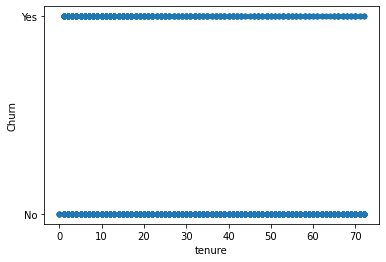

In [67]:
mt.figure(figsize=(14,9))

fd3.plot(kind='scatter',  x='tenure',  y='Churn')

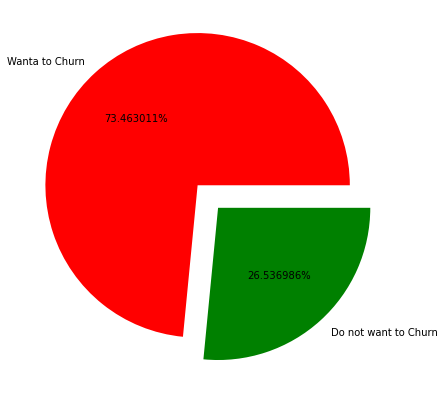

In [68]:
mt.figure(figsize= (12,7))
labels=["Wanta to Churn","Do not want to Churn"]
explode = [0.1, 0.1]
colors=['red','green']
sizes=fd3.Churn.value_counts().values
mt.pie(sizes,explode,labels,autopct='%0f%%',colors=colors)
mt.show()

In [69]:
fd3["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [70]:
 fd3['TotalCharges'] = ps.to_numeric(fd3['TotalCharges'],errors='coerce')
#fd3['TotalCharges'] = fd3['TotalCharges'].astype("float")

In [71]:
fd3.columns.to_series().groupby(fd3.dtypes).groups

{int64: ['tenure', 'SeniorCitizen'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender', 'Partner', 'Dependents']}

In [72]:
fd3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   PhoneService      7043 non-null   object 
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  gender            7043 non-null   object 


# Label Encoding

In [74]:
#Create a label encoder object
# le = LabelEncoder()
# # Label Encoding will be used for columns with 2 or less unique values
# le_count = 0
# for col in fd3.columns[1:]:
#     if fd3[col].dtype == 'object':
#         if len(list(fd3[col].unique())) <= 2:
#             le.fit(fd3[col])
#             fd3[col] = le.transform(fd3[col])
#             le_count += 1
# print('{} columns were label encoded.'.format(le_count))
from sklearn.preprocessing import LabelEncoder

cat_cols=["PhoneService","Churn","Contract","PaperlessBilling","PaymentMethod","TotalCharges","gender","Partner","Dependents","MultipleLines",
         "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
le=LabelEncoder()
for x in cat_cols:
    fd3[x]=le.fit_transform(fd3[x])

<AxesSubplot:xlabel='Churn', ylabel='Count'>

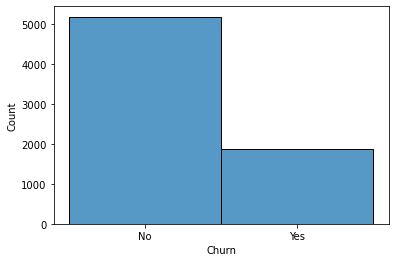

In [73]:
sns.histplot(data=fd3,x="Churn",bins=101)

In [75]:
fd3.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,1,0,0,1,2,29.85,74,0,1,0,0,2,0,0,0,0,0,0,1,0
1,34,1,1,0,3,56.95,3624,0,0,0,2,0,2,0,0,0,1,0,0,0
2,2,1,0,1,3,53.85,536,1,0,0,2,2,0,0,0,0,1,0,0,0
3,45,0,1,0,0,42.30,3570,0,1,0,2,0,2,2,0,0,1,0,0,0
4,2,1,0,1,2,70.70,674,1,0,1,0,0,0,0,0,0,0,0,0,0


In [76]:
fd3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   PhoneService      7043 non-null   int32  
 2   Contract          7043 non-null   int32  
 3   PaperlessBilling  7043 non-null   int32  
 4   PaymentMethod     7043 non-null   int32  
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   int64  
 7   Churn             7043 non-null   int32  
 8   MultipleLines     7043 non-null   int32  
 9   InternetService   7043 non-null   int32  
 10  OnlineSecurity    7043 non-null   int32  
 11  OnlineBackup      7043 non-null   int32  
 12  DeviceProtection  7043 non-null   int32  
 13  TechSupport       7043 non-null   int32  
 14  StreamingTV       7043 non-null   int32  
 15  StreamingMovies   7043 non-null   int32  
 16  gender            7043 non-null   int32  


In [20]:
#fd3.select_dtypes(exclude="object",)

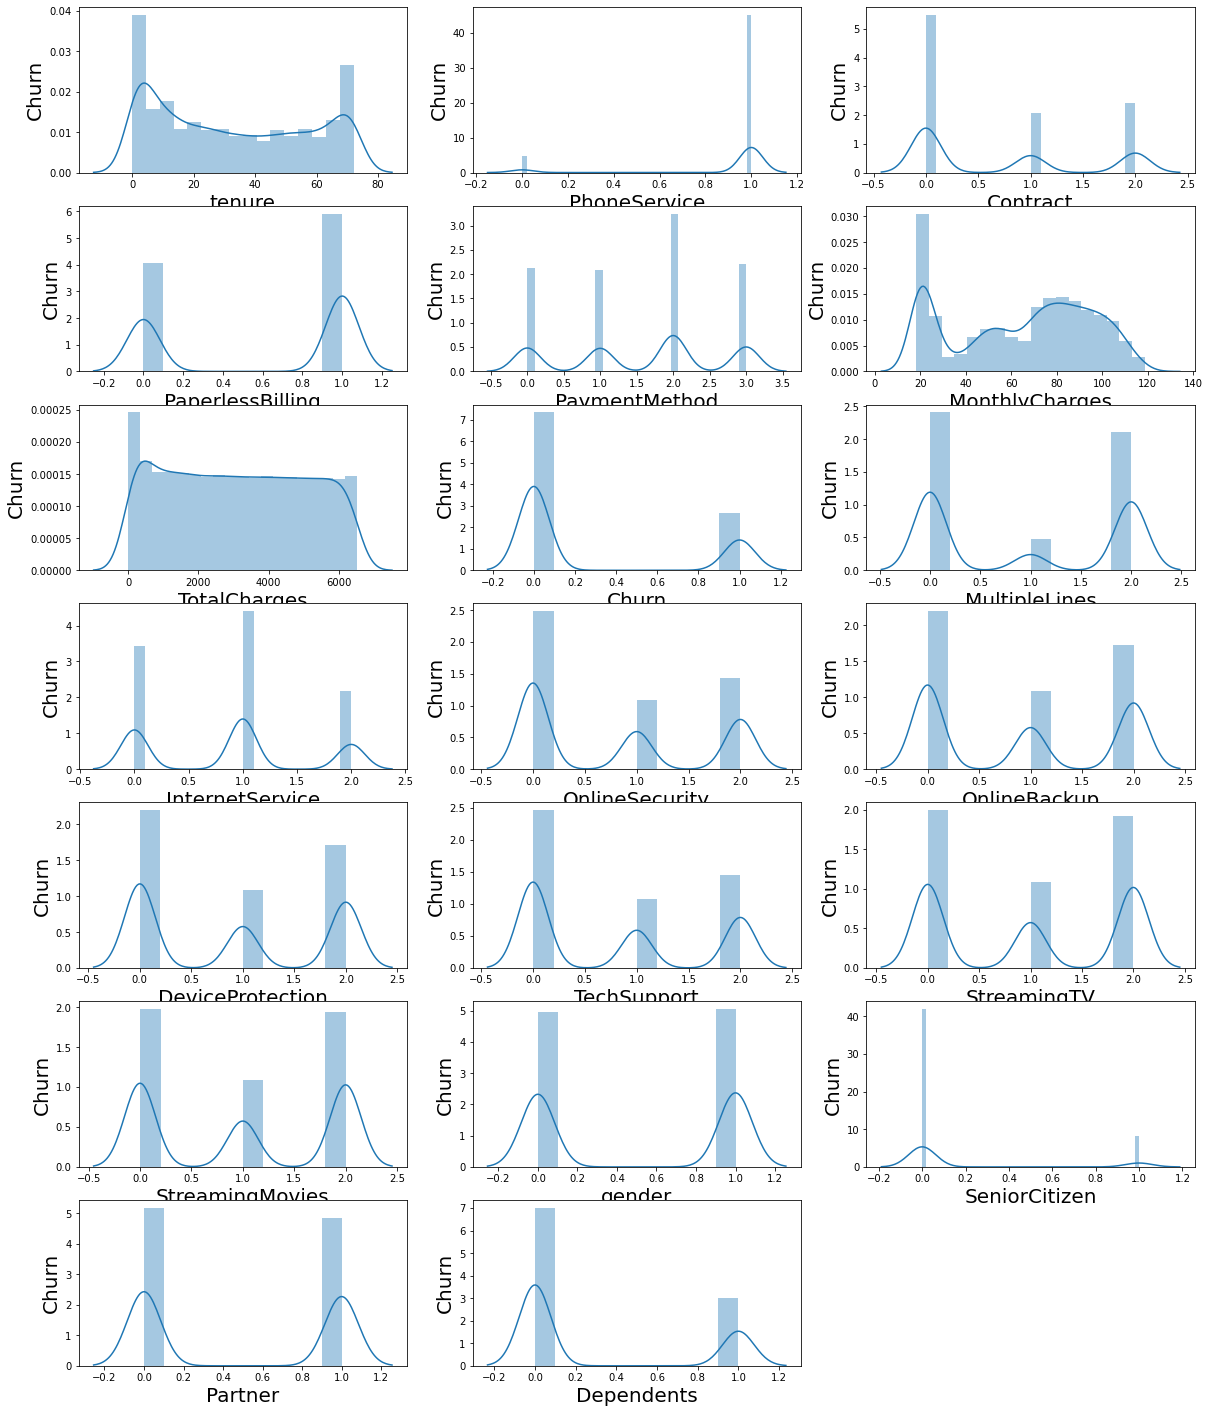

In [77]:
mt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in fd3:
    if plotnumber<=21:     # as there are 9 columns in the data
        ax = mt.subplot(7,3,plotnumber)
        sns.distplot(fd3[column])
        mt.xlabel(column,fontsize=20)
        mt.ylabel('Churn',fontsize=20)
        plotnumber+=1
    else:
        continue
mt.show()

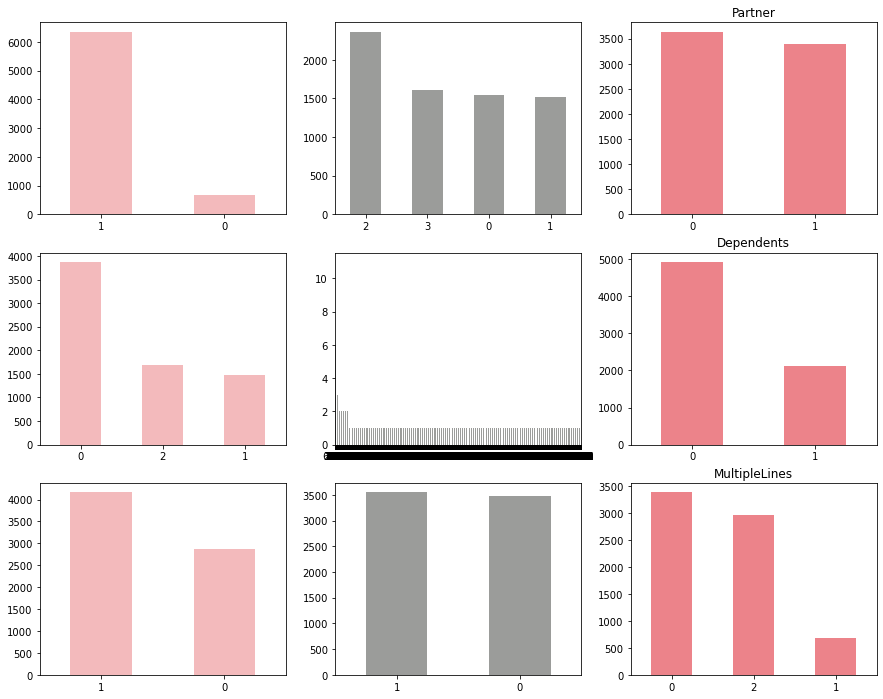

In [78]:
services= ["PhoneService","Contract","PaperlessBilling","PaymentMethod","TotalCharges","gender","Partner","Dependents","MultipleLines",
         "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
fig, axes = mt.subplots(nrows = 3,ncols = 3,
figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = fd3[item].value_counts().plot(
        kind = 'bar',ax=axes[i,0],
        rot = 0, color ='#f3babc' )
        
    elif i >=3 and i < 6:
        ax = fd3[item].value_counts().plot(
        kind = 'bar',ax=axes[i-3,1],
        rot = 0,color ='#9b9c9a')
        
    elif i < 9:
        ax = fd3[item].value_counts().plot(
        kind = 'bar',ax=axes[i-6,2],rot = 0,
        color = '#ec838a')
        ax.set_title(item)

In [79]:
# coefficient of variance
cv = lambda x: pn.std(x, ddof=1) / pn.mean(x) * 100 
cv(fd3)

tenure               75.868426
PhoneService         32.746156
Contract            120.751349
PaperlessBilling     82.985642
PaymentMethod        67.845026
MonthlyCharges       46.462725
TotalCharges         62.644849
Churn               166.394664
MultipleLines       100.855466
InternetService      84.520163
OnlineSecurity      108.840869
OnlineBackup         97.101884
DeviceProtection     97.291676
TechSupport         108.085155
StreamingTV          89.813662
StreamingMovies      89.180170
gender               99.060216
SeniorCitizen       227.332009
Partner             103.460368
Dependents          152.913266
dtype: float64

In [24]:
# mt.figure(figsize=(20, 12))
# mt.subplot(2,3,1)
# sns.boxplot(x = 'Contract', y = 'Churn', data = housing)
# mt.subplot(2,3,2)
# sns.boxplot(x = 'guestroom', y = 'Churn', data = housing)
# mt.subplot(2,3,3)
# sns.boxplot(x = 'basement', y = 'Churn', data = housing)
# mt.subplot(2,3,4)
# sns.boxplot(x = 'hotwaterheating', y = 'Churn', data = housing)
# mt.subplot(2,3,5)
# sns.boxplot(x = 'airconditioning', y = 'Churn', data = housing)
# mt.subplot(2,3,6)
# sns.boxplot(x = 'furnishingstatus', y = 'Churn', data = housing)
# mt.show()

In [80]:
fd3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   PhoneService      7043 non-null   int32  
 2   Contract          7043 non-null   int32  
 3   PaperlessBilling  7043 non-null   int32  
 4   PaymentMethod     7043 non-null   int32  
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   int64  
 7   Churn             7043 non-null   int32  
 8   MultipleLines     7043 non-null   int32  
 9   InternetService   7043 non-null   int32  
 10  OnlineSecurity    7043 non-null   int32  
 11  OnlineBackup      7043 non-null   int32  
 12  DeviceProtection  7043 non-null   int32  
 13  TechSupport       7043 non-null   int32  
 14  StreamingTV       7043 non-null   int32  
 15  StreamingMovies   7043 non-null   int32  
 16  gender            7043 non-null   int32  


<AxesSubplot:>

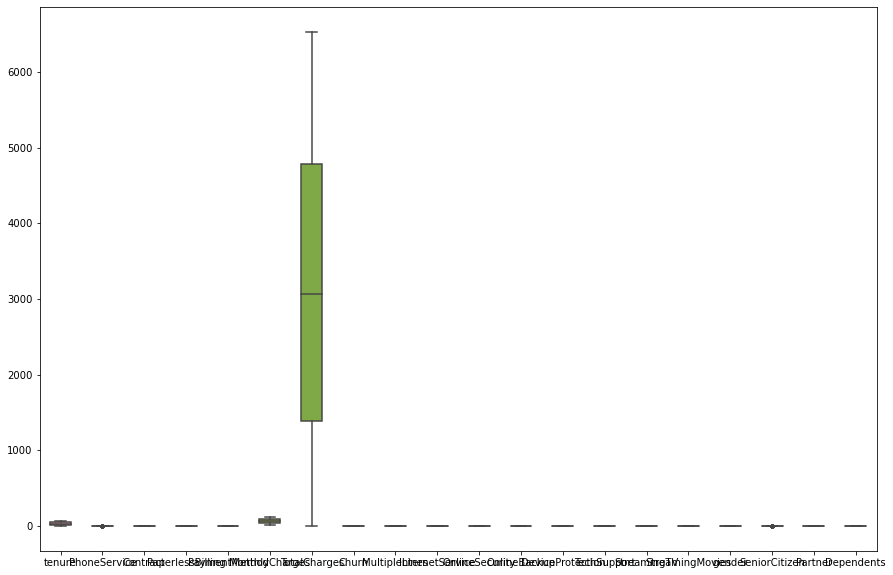

In [81]:
fig, ax = mt.subplots(figsize=(15,10))
sns.boxplot(data=fd3, width= 0.5,ax=ax,  fliersize=3)

In [82]:
X = fd3.drop(columns = ['PaperlessBilling'])
y = fd3['PaperlessBilling']

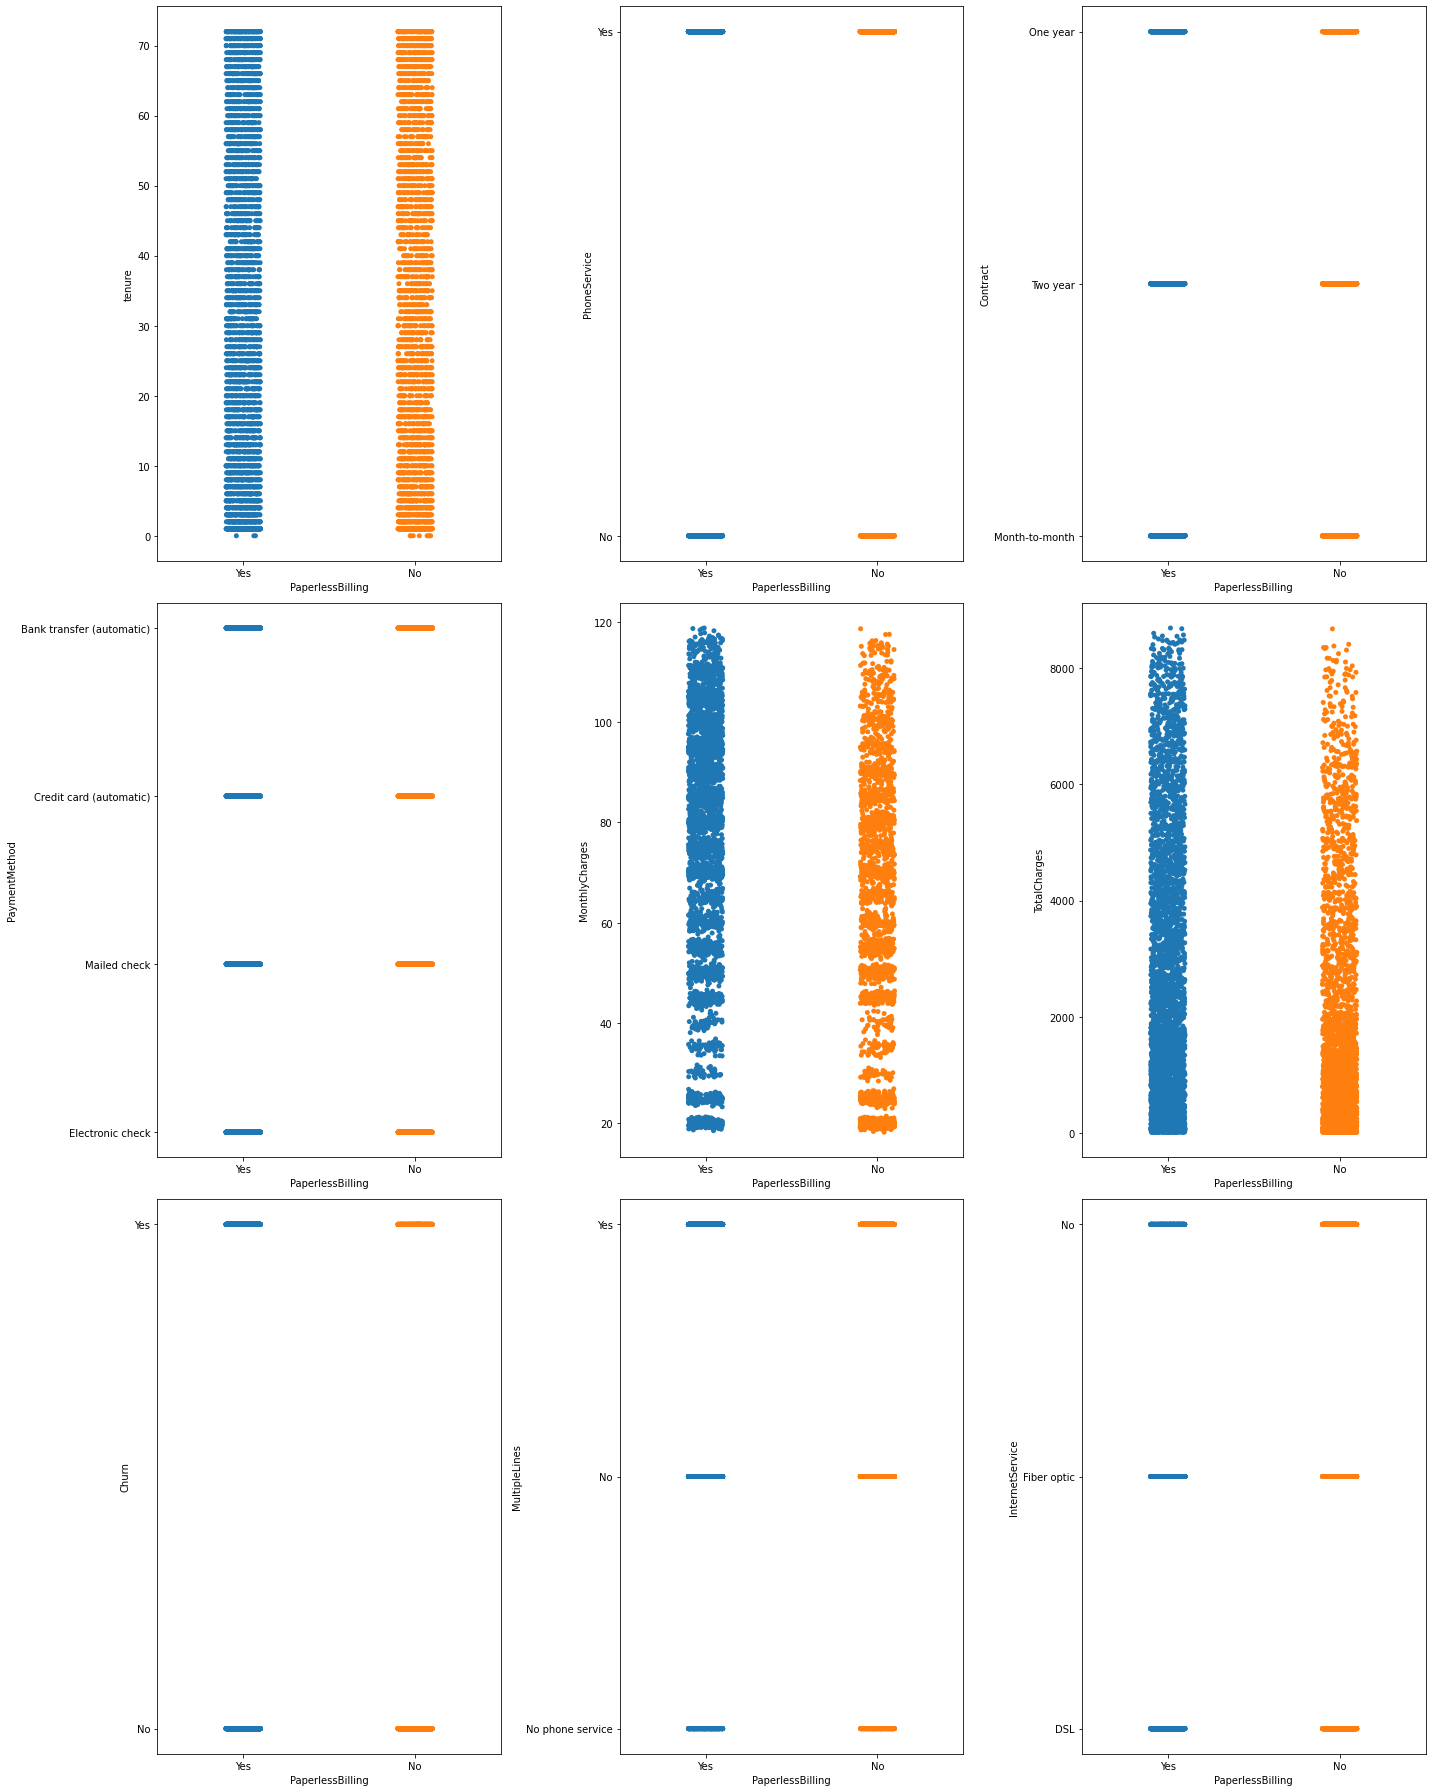

In [28]:
# let's see how data is distributed for every column
mt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = mt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
mt.tight_layout()

In [83]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [84]:
X_scaled

array([[-1.27744458, -3.05401039, -0.8282069 , ..., -0.43991649,
         1.03453023, -0.65401193],
       [ 0.06632742,  0.32743831,  0.37127103, ..., -0.43991649,
        -0.96662231, -0.65401193],
       [-1.23672422,  0.32743831, -0.8282069 , ..., -0.43991649,
        -0.96662231, -0.65401193],
       ...,
       [-0.87024095, -3.05401039, -0.8282069 , ..., -0.43991649,
         1.03453023,  1.5290241 ],
       [-1.15528349,  0.32743831, -0.8282069 , ...,  2.27315869,
         1.03453023, -0.65401193],
       [ 1.36937906,  0.32743831,  1.57074896, ..., -0.43991649,
        -0.96662231, -0.65401193]])

In [85]:
fd3.shape

(7043, 20)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

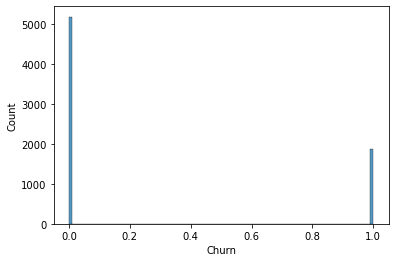

In [86]:
sns.histplot(data=fd3,x="Churn",bins=101)

In [87]:
fd3.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,1,0,0,1,2,29.85,74,0,1,0,0,2,0,0,0,0,0,0,1,0
1,34,1,1,0,3,56.95,3624,0,0,0,2,0,2,0,0,0,1,0,0,0
2,2,1,0,1,3,53.85,536,1,0,0,2,2,0,0,0,0,1,0,0,0
3,45,0,1,0,0,42.30,3570,0,1,0,2,0,2,2,0,0,1,0,0,0
4,2,1,0,1,2,70.70,674,1,0,1,0,0,0,0,0,0,0,0,0,0


In [88]:
fd3.value_counts(subset="MultipleLines")


MultipleLines
0    3390
2    2971
1     682
dtype: int64

In [89]:
fd3.value_counts(subset="OnlineSecurity")

OnlineSecurity
0    3498
2    2019
1    1526
dtype: int64

In [90]:
fd3.isnull().sum()/len(fd)*100

tenure              0.0
PhoneService        0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
dtype: float64

# Train Test Split

In [94]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
pn.random.seed(0)
df_train, df_test = train_test_split(fd3, train_size = 0.7, test_size = 0.3, random_state = 100)

# Min Max Scalar

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
 scaler = MinMaxScaler()

In [97]:
num_vars=['tenure','MonthlyCharges','TotalCharges',"PhoneService","Contract","PaperlessBilling","PaymentMethod","MultipleLines",
         "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
        "gender","SeniorCitizen","Partner","Dependents" ]
fd3[num_vars]=scaler.fit_transform(fd3[num_vars])

In [98]:
for x in fd3:
    print(x)

tenure
PhoneService
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
gender
SeniorCitizen
Partner
Dependents


In [55]:
fd3.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,34,Yes,One year,No,Mailed check,56.95,1889.50,No,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No


In [56]:
fd3.describe()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.162147
std,24.559481,30.090047,2266.771362,0.368612
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,0.000000
max,72.000000,118.750000,8684.800000,1.000000


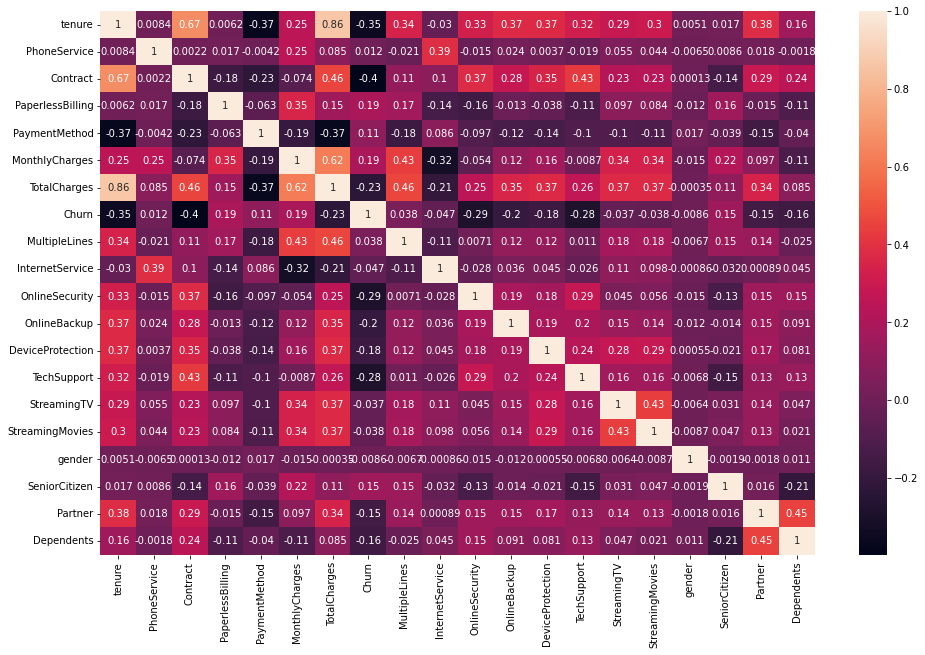

In [99]:
# Let's check the correlation coefficients to see which variables are highly correlated

mt.figure(figsize = (16, 10))
sns.heatmap(fd3.corr(), annot = True)
mt.show()

In [153]:
X = fd3.drop(columns = ['Churn'])
y = fd3['Churn']

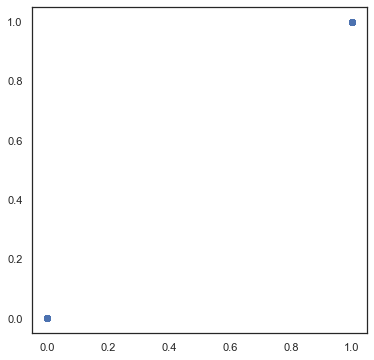

In [154]:
mt.figure(figsize=[6,6])
mt.scatter(df_train.Partner, df_train.Partner)
mt.show()

# VIF Score

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = ps.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

In [102]:
vif

,vif,Features
0,11.170592,tenure
1,1.628154,PhoneService
2,2.517997,Contract
3,1.180163,PaymentMethod
4,5.264735,MonthlyCharges
5,15.294291,TotalCharges
6,1.414827,Churn
7,1.402325,MultipleLines
8,1.873758,InternetService
9,1.257711,OnlineSecurity


In [155]:
from sklearn.preprocessing import StandardScaler 
from statsmodels.stats.outliers_influence import variance_inflation_factor

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [156]:
X_scaled

array([[-1.27744458, -3.05401039, -0.8282069 , ..., -0.43991649,
         1.03453023, -0.65401193],
       [ 0.06632742,  0.32743831,  0.37127103, ..., -0.43991649,
        -0.96662231, -0.65401193],
       [-1.23672422,  0.32743831, -0.8282069 , ..., -0.43991649,
        -0.96662231, -0.65401193],
       ...,
       [-0.87024095, -3.05401039, -0.8282069 , ..., -0.43991649,
         1.03453023,  1.5290241 ],
       [-1.15528349,  0.32743831, -0.8282069 , ...,  2.27315869,
         1.03453023, -0.65401193],
       [ 1.36937906,  0.32743831,  1.57074896, ..., -0.43991649,
        -0.96662231, -0.65401193]])

In [158]:
X=fd3.drop('Churn',axis=1)
y=fd3['Churn']

In [139]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [140]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [159]:
logmodel=LogisticRegression()

In [160]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [161]:
prediction=logmodel.predict(x_test)

In [163]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.63      0.57      0.60       697\n           1       0.74      0.78      0.76      1064\n\n    accuracy                           0.70      1761\n   macro avg       0.68      0.68      0.68      1761\nweighted avg       0.70      0.70      0.70      1761\n'

In [164]:
from sklearn.metrics import confusion_matrix

In [165]:
confusion_matrix=confusion_matrix(y_test,prediction)
confusion_matrix

array([[400, 297],
       [233, 831]], dtype=int64)

In [166]:
true_positive =confusion_matrix[0][0]
false_positive =confusion_matrix[0][1]
false_negative =confusion_matrix[1][0]
true_negative =confusion_matrix[1][1]
print('True-Negative=',true_negative)
print('True-Positive=',true_positive)
print('False-Negative=',false_negative)
print('False-Positive=',false_positive)

True-Negative= 831
True-Positive= 400
False-Negative= 233
False-Positive= 297


In [167]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.6990346394094265

In [142]:
y_pred = log_reg.predict(x_test)

In [175]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6990346394094265

In [144]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[400, 297],
       [233, 831]], dtype=int64)

In [174]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [146]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.6990346394094265

In [147]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.5738880918220947

In [148]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.631911532385466

In [168]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.6015037593984962

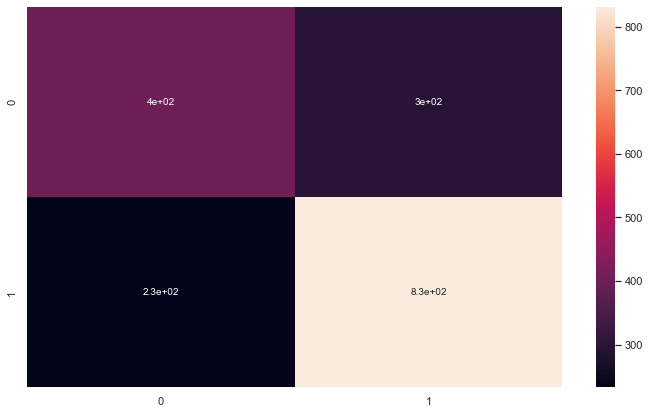

In [171]:
mt.figure(figsize=(12,7))
sns.heatmap(confusion_matrix,annot=True)
mt.show()

In [169]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6774515647080398

In [172]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

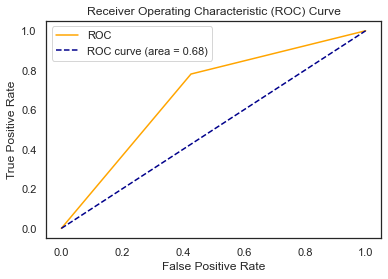

In [176]:
mt.plot(fpr, tpr, color='orange', label='ROC')
mt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
mt.xlabel('False Positive Rate')
mt.ylabel('True Positive Rate')
mt.title('Receiver Operating Characteristic (ROC) Curve')
mt.legend()
mt.show()